In [1]:
# unit test
import unittest
# test data
import medmnist
from medmnist import INFO

# model and transform
from torchvision import transforms
from torchvision.models import shufflenet_v2_x1_0, ShuffleNet_V2_X1_0_Weights
from torchvision.models.feature_extraction import get_graph_node_names

# "helper" needs to be part of sys path
import sys
sys.path.insert(0, "helper")
sys.path.insert(0, "/helper")
sys.path.insert(0, "./helper")
sys.path.insert(0, "../helper")
print(sys.path)

device="cuda"

%load_ext autoreload
%autoreload 2

# own module
from visualisation.deepdream import *

['../helper', './helper', '/helper', 'helper', 'C:\\Users\\Prinzessin\\projects\\decentnet\\medical_ai\\examples', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\python39.zip', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\DLLs', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta', '', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Prinzessin\\anaconda3\\envs\\feta\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Prinzessin\\.ipython']


Using downloaded and verified file: C:\Users\Prinzessin\.medmnist\retinamnist.npz
example graph nodes: ['stage2.0.branch2.0', 'stage2.0.branch2.1', 'stage2.0.branch2.2', 'stage2.0.branch2.3', 'stage2.0.branch2.4', 'stage2.0.branch2.5', 'stage2.0.branch2.6', 'stage2.0.branch2.7', 'stage2.0.cat', 'stage2.0.size']
Layer: Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)


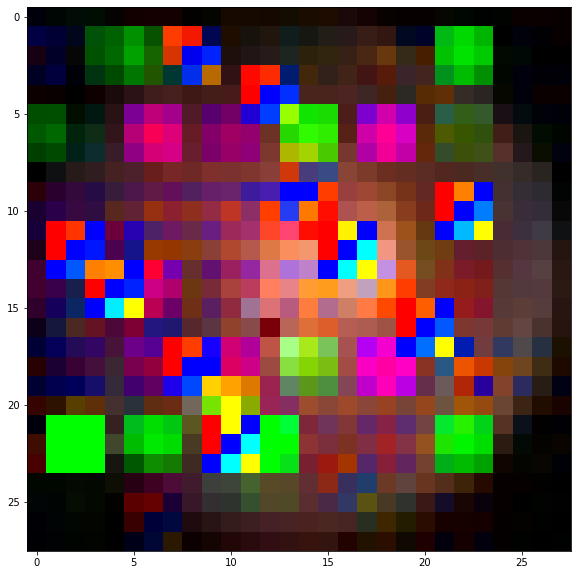

In [14]:

# dataloader
# get one example image from medmnist
info = INFO['retinamnist']
DataClass = getattr(medmnist, info['python_class'])
train_dataset = DataClass(split='train', download=True)       
img, label = train_dataset.__getitem__(1)

# tensor preparation
to_tensor = transforms.ToTensor()
img = to_tensor(img).to(device)

# model preparation
model = shufflenet_v2_x1_0(weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1).to(device)


# layer to focus on
print("example graph nodes:", get_graph_node_names(model)[0][10:20])
layer = model.stage2[0].branch1[2] # model.fusion_layer # conv

# run deep dream
dd = DeepDream(model=model, layer=layer, device=device, iterations=1000, lr=0.1)
dd.run(img)
dd.plot()